In [31]:
# 패키지 로딩하기 : 패키지를 메모리에 올리는 기능
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import seaborn           as sns

In [2]:
# 그래프의 한글 깨짐 처리
plt.rcParams["font.family"] = "Malgun Gothic"

In [55]:
# 파일 경로
file_path = "D:/SEOUL/서울시노인의료복지시설현황.xlsx"

# 엑셀 파일 읽기
seoul = pd.read_excel(file_path)

# 데이터 확인
print(seoul.head())

  관할자치구   지역      장기요양기관기호            기관명칭   설립구분          법인명  \
0   종로구  도심권  1.111100e+10         청운노인요양원  비영리법인  사회복지법인청운양로원   
1   종로구  도심권  1.111100e+10         인자인케어센터   영리법인     주식회사 인자인   
2   종로구  도심권  1.111100e+10        평창동시니어센터     개인          NaN   
3   종로구  도심권  1.111100e+10     아름다운뜰안에 요양원     개인          NaN   
4   종로구  도심권  1.111100e+10  서울여자간호대학교 휴먼캐슬  비영리법인    학교법인 의담학회   

  병설시설일경우 母기관의 이름       지정일  정원    현원  ...  대기인원  사회복지사  요양보호사  의사  간호요원  조리원  \
0             NaN  20080625  45  41.0  ...   NaN    1.0   19.0   0   2.0    0   
1             NaN  20100701  42  42.0  ...  10.0    2.0   18.0   0   3.0    2   
2             NaN  20101125  68  68.0  ...   NaN    1.0   33.0   1   5.0    0   
3             NaN  20110823  38  38.0  ...   NaN    2.0   18.0   0   2.0    0   
4             NaN  20130530  38  35.0  ...   NaN    2.0   17.0   1   2.0    2   

   기타            전화              기관소재지(새주소) 휴업시설(미운영)  
0   4  02-3217-0057          서울시 종로구 비봉길 76       NaN  
1   

In [13]:
# 데이터 정보(Information) 보기
print(seoul.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   관할자치구            493 non-null    object 
 1   장기요양기관기호         492 non-null    float64
 2   기관명칭             493 non-null    object 
 3   설립구분             493 non-null    object 
 4   법인명              133 non-null    object 
 5   병설시설일경우 母기관의 이름  27 non-null     object 
 6   지정일              493 non-null    int64  
 7   정원               493 non-null    int64  
 8   현원               492 non-null    float64
 9   남                459 non-null    float64
 10  여                487 non-null    float64
 11  치매               487 non-null    float64
 12  비치매              438 non-null    float64
 13  대기인원             359 non-null    float64
 14  사회복지사            481 non-null    float64
 15  요양보호사            487 non-null    float64
 16  의사               373 non-null    object 
 17  간호요원            

### 1. 범주형 데이터 분석

       빈도  백분율(%)
관할자치구            
도봉구    55   11.16
중랑구    49    9.94
강서구    34    6.90
강북구    31    6.29
관악구    30    6.09
노원구    28    5.68
은평구    24    4.87
성북구    23    4.67
동대문구   22    4.46
강동구    22    4.46
금천구    22    4.46
광진구    20    4.06
양천구    18    3.65
송파구    17    3.45
영등포구   17    3.45
구로구    15    3.04
서대문구   13    2.64
강남구    10    2.03
동작구     9    1.83
종로구     9    1.83
성동구     8    1.62
서초구     6    1.22
용산구     4    0.81
중구      3    0.61
마포구     3    0.61
관외      1    0.20


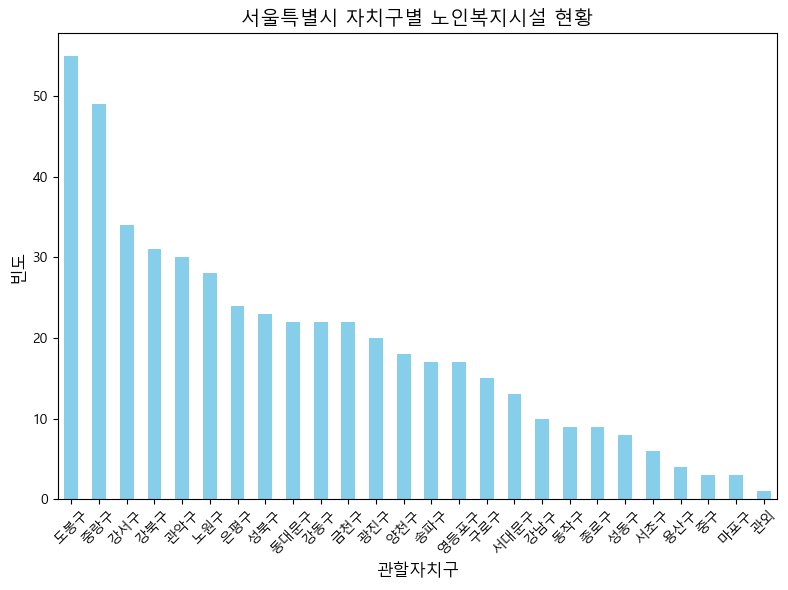

In [18]:
# 관할자치구 : 강남구~중랑구
# 범주형 데이터(Categorical Data)

# 1. 관할자치구 열의 빈도 계산
freq = seoul['관할자치구'].value_counts()

# 2. 백분율 계산
percent = seoul['관할자치구'].value_counts(normalize = True) * 100

# 3. 빈도와 백분율을 하나의 DataFrame으로 정리
report_stats = pd.DataFrame({'빈도': freq, '백분율(%)': percent.round(2)})
print(report_stats)

# 4. 막대그래프 그리기 (빈도 기준)
plt.figure(figsize = (8, 6))
freq.plot(kind = 'bar', color = 'skyblue')
plt.title("서울특별시 자치구별 노인복지시설 현황", fontsize = 14)
plt.xlabel("관할자치구", fontsize = 12)
plt.ylabel("빈도", fontsize = 12)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### 2. 수치형 데이터 분석

In [19]:
# 정원 : 수치형 데이터

# 최소값 : 0명
# 최대값 : 300명

# 정원 -> 정원Group
# 0명 이상 ~ 10명 미만 : 소형
# 10명 이상 ~ 50명 미만 : 보통
# 50명 이상 ~ 100명 미만 : 중형
# 100명 이상 ~ 200명 미만 : 대형
# 200억 이상 ~ 300명 미만 : 초대형

In [22]:
# 구간 (단위: 만원)
bins   = [0, 10, 50, 100, 200, 300]
labels = ["소형", "보통", "중형", "대형", "초대형"]

# 새로운 열 생성
seoul['정원Group'] = pd.cut(seoul['정원'], 
                               bins   = bins, 
                               labels = labels, 
                               right  = False)

# 결과 확인
print(seoul[['정원', '정원Group']].head(10))

   정원 정원Group
0  45      보통
1  42      보통
2  68      중형
3  38      보통
4  38      보통
5  23      보통
6  77      중형
7  16      보통
8  60      중형
9  14      보통


In [23]:
# 1. 빈도 계산
freq_group = seoul['정원Group'].value_counts().sort_index()

# 2. 백분율 계산
percent_group = seoul['정원Group'].value_counts(normalize = True).sort_index() * 100

# 3. 데이터프레임으로 정리
price_group_stats = pd.DataFrame({
    '빈도'     : freq_group,
    '백분율(%)': percent_group.round(2)
})

print(price_group_stats)

          빈도  백분율(%)
정원Group             
소형       258   52.33
보통       140   28.40
중형        58   11.76
대형        30    6.09
초대형        7    1.42


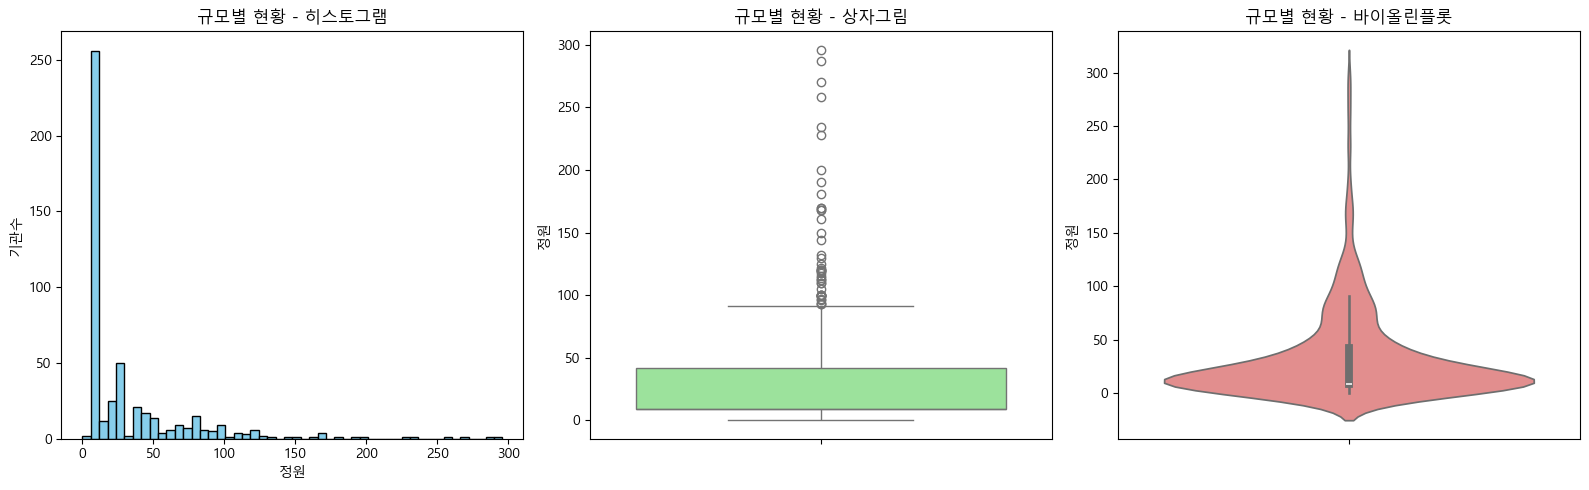

In [27]:
# Figure 생성
plt.figure(figsize = (16, 5))

# 1. 히스토그램
plt.subplot(1, 3, 1)
plt.hist(seoul['정원'], bins = 50, color = 'skyblue', edgecolor = 'black')
plt.title("규모별 현황 - 히스토그램")
plt.xlabel("정원")
plt.ylabel("기관수")

# 2. 상자그림
plt.subplot(1, 3, 2)
sns.boxplot(y = seoul['정원'], color = 'lightgreen')
plt.title("규모별 현황 - 상자그림")

# 3. 바이올린플롯
plt.subplot(1, 3, 3)
sns.violinplot(y = seoul['정원'], color = 'lightcoral')
plt.title("규모별 현황 - 바이올린플롯")

plt.tight_layout()
plt.show()

In [33]:
# 기술통계량
stats = seoul['정원'].describe()
print(stats)

count    493.000000
mean      33.959432
std       43.585753
min        0.000000
25%        9.000000
50%        9.000000
75%       42.000000
max      296.000000
Name: 정원, dtype: float64


### 3. 범주형 데이터의 분석

빈도표:
설립구분    비영리법인  개인  구립  비영리법인  시립  시립병설  영리법인
관할자치구                                       
강남구         1   2   4      1   0     0     2
강동구         0  17   0      3   0     1     1
강북구         0  23   1      4   0     0     3
강서구         0  30   0      3   0     0     1
관악구         0  23   0      6   0     1     0
관외          0   0   0      0   1     0     0
광진구         0  13   1      3   0     0     3
구로구         0  11   0      4   0     0     0
금천구         0  14   1      4   0     0     3
노원구         0  22   1      2   1     0     2
도봉구         0  50   1      0   0     0     4
동대문구        0  18   0      3   1     0     0
동작구         0   3   1      2   0     0     3
마포구         0   1   0      0   2     0     0
서대문구        0   6   2      4   0     1     0
서초구         0   3   2      0   0     0     1
성동구         0   7   0      0   1     0     0
성북구         0  18   0      4   0     0     1
송파구         0  12   2      1   1     0     1
양천구         0  13   2      2   0     1     0
영등포구 

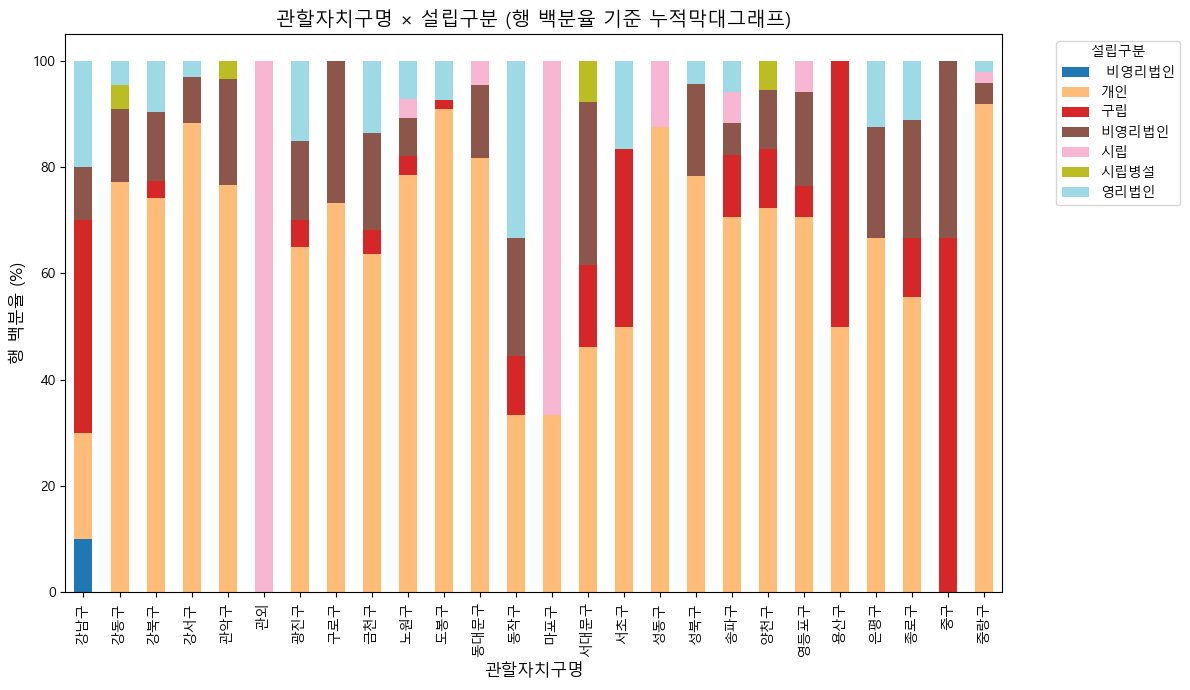

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 교차표 생성 (빈도)
crosstab_freq = pd.crosstab(seoul['관할자치구'], seoul['설립구분'])

# 2. 행 백분율 계산
crosstab_rowpct = crosstab_freq.div(crosstab_freq.sum(axis=1), axis=0) * 100

# 3. 결과 확인
print("빈도표:")
print(crosstab_freq)
print("\n행 백분율:")
print(crosstab_rowpct.round(2))

# 4. 행 백분율 기준 누적 막대그래프
crosstab_rowpct.plot(kind='bar', stacked=True, figsize=(12, 7), colormap="tab20")

plt.title("관할자치구명 × 설립구분 (행 백분율 기준 누적막대그래프)", fontsize=14)
plt.xlabel("관할자치구명", fontsize=12)
plt.ylabel("행 백분율 (%)", fontsize=12)
plt.legend(title="설립구분", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [38]:
# df_melted 데이터에 관할자치구명과 성별에 대한 행백분율을 구하고 행백분율을 기준으로 누적막대그래프를 그려줘.
# 자치구별 총합
df_total = df_melted.groupby("관할자치구")["인원수"].transform("sum")

# 행백분율 계산
df_melted["perc"] = df_melted["인원수"] / df_total * 100

print(df_melted.head())

  관할자치구 성별   인원수      perc
0   종로구  남   0.0  0.000000
1   종로구  남   5.0  1.488095
2   종로구  남  11.0  3.273810
3   종로구  남   5.0  1.488095
4   종로구  남   0.0  0.000000


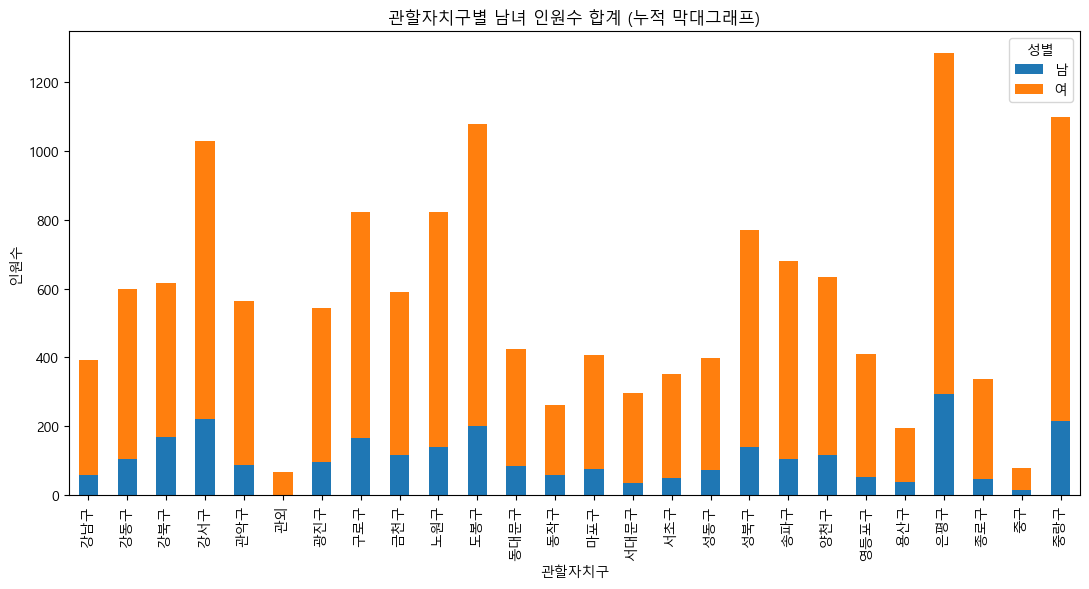

In [46]:
# 관할자치구별 남 여 비율로 말고 남녀 인원수 합계로 누적 막대그래프를 그려줘.
# 자치구별 성별 인원수 합계 구하기
df_pivot = df_melted.pivot_table(
    index="관할자치구",
    columns="성별",
    values="인원수",
    aggfunc="sum"   # 같은 구·성별이 여러 번 있으면 합계로 집계
).fillna(0)

# 누적 막대그래프 그리기
df_pivot.plot(kind="bar", stacked=True, figsize=(11, 6))

plt.ylabel("인원수")
plt.xlabel("관할자치구")
plt.title("관할자치구별 남녀 인원수 합계 (누적 막대그래프)")
plt.legend(title="성별")
plt.tight_layout()
plt.show()

### 4. 범주별 수치형 데이터 분석

Text(0.5, 1.0, '지역별 정원 바이올린 그래프')

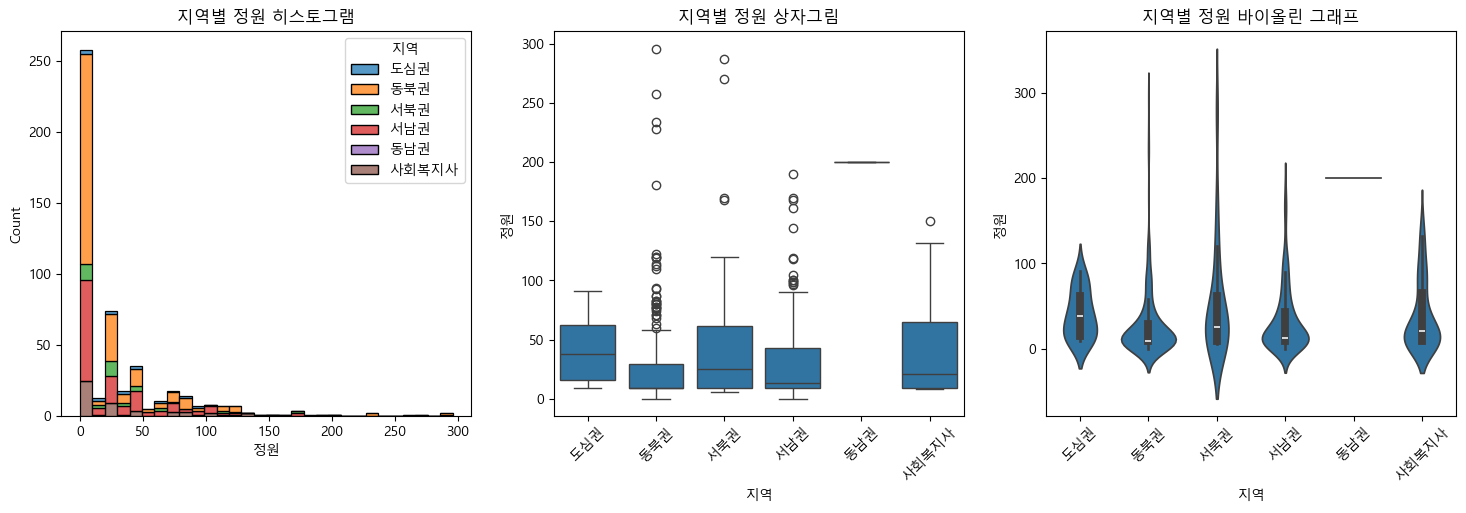

In [56]:
# 그래프 크기 설정
plt.figure(figsize=(18, 5))

# 1. 히스토그램 (정원 분포, 지역별 색상 구분)
plt.subplot(1, 3, 1)
sns.histplot(data=seoul, x="정원", hue="지역", multiple="stack", bins=30)
plt.title("지역별 정원 히스토그램")

# 2. 상자그림 (지역별 정원 분포 요약)
plt.subplot(1, 3, 2)
sns.boxplot(data=seoul, x="지역", y="정원")
plt.xticks(rotation=45)
plt.title("지역별 정원 상자그림")

# 3. 바이올린 플롯 (지역별 정원 분포 밀도)
plt.subplot(1, 3, 3)
sns.violinplot(data=seoul, x="지역", y="정원", inner="box")
plt.xticks(rotation=45)
plt.title("지역별 정원 바이올린 그래프")

### 5. 수치형 데이터 분석

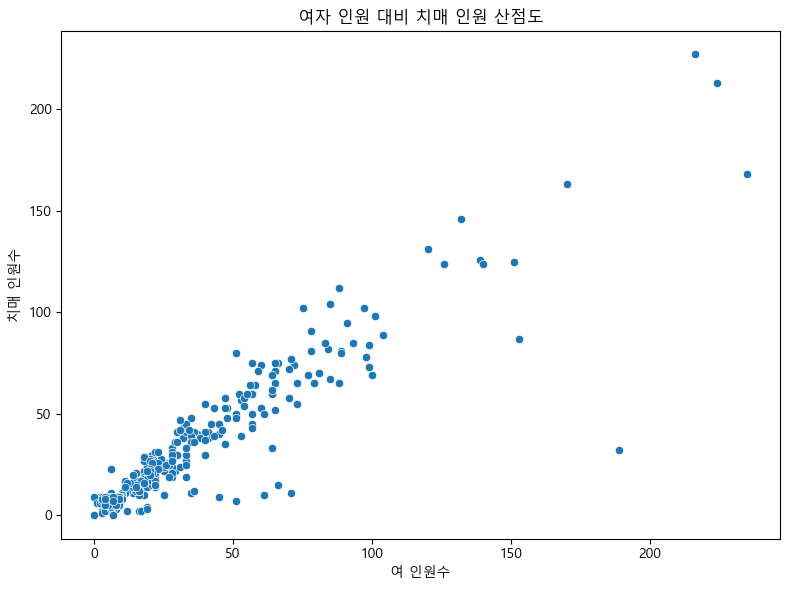

In [61]:
# 여 인원대비 치매 인원의 산점도를 그려줘.
plt.figure(figsize=(8, 6))

# 산점도 그리기
sns.scatterplot(data=seoul, x="여", y="치매")

# 그래프 제목 및 라벨
plt.title("여자 인원 대비 치매 인원 산점도")
plt.xlabel("여 인원수")
plt.ylabel("치매 인원수")

plt.tight_layout()
plt.show()

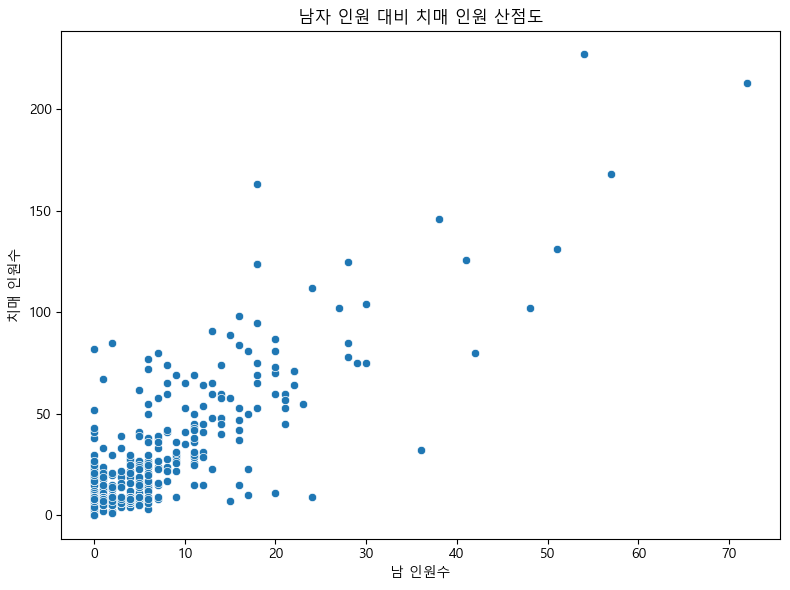

In [62]:
# 남 인원대비 치매 인원의 산점도를 그려줘.
plt.figure(figsize=(8, 6))

# 산점도 그리기
sns.scatterplot(data=seoul, x="남", y="치매")

# 그래프 제목 및 라벨
plt.title("남자 인원 대비 치매 인원 산점도")
plt.xlabel("남 인원수")
plt.ylabel("치매 인원수")

plt.tight_layout()
plt.show()